# 推薦一個活動

輸入以下對話  

最近活動  
活動  
逢甲最近有什麼活動呢?  
最近有什麼活動  
有什麼活動  
逢甲活動  
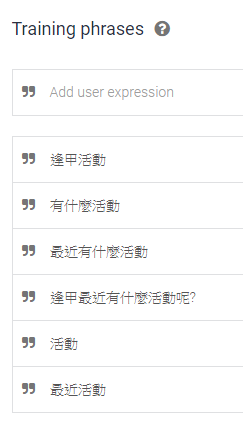

https://notebooks.azure.com/fcu-liu/libraries/socialbot/html/02-basic-ChatBot/one.png

In [1]:
import requests
from bs4 import BeautifulSoup,Tag
import pandas as pd
from datetime import datetime
from dateutil import parser

def get_one_activity():
    import requests
    from bs4 import BeautifulSoup, Tag
    html = requests.get("http://news.fcu.edu.tw/wSite/lp?ctNode=15361&mp=9000&pagesize=50")
    soup = BeautifulSoup(html.content, "lxml")

    table = soup.find('table', {'class': 'tb'})

    msg = ''
    for row in table.find_all('tr')[1:2]:
        fields = row.find_all('td')
        post_date = fields[0].text.strip()
        title = fields[1].text.strip()
        link = 'http://news.fcu.edu.tw/wSite/' + fields[1].find('a', href=True).get('href')
        start_date = fields[2].text.strip()
        end_date = fields[3].text.strip()
        msg = post_date + title + start_date + end_date

    return msg

In [ ]:
import json
from flask import Flask, request, make_response, jsonify

app = Flask(__name__)


@app.route("/")
def verify():
    return "Hello world", 200


@app.route('/', methods=['POST'])
def webhook():
    req = request.get_json(silent=True, force=True)
    print(req)
    res = {'fulfillmentText':get_one_activity()}
    print('queryText: ' + str(res))

    return make_response(jsonify(res))

if __name__ == '__main__':
    app.run(port=5000)